In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv

In [7]:
#load datasets
path = 'C:/Users/Helen//Desktop/brazilian-ecommerce/'
customer = pd.read_csv(path + 'olist_customers_dataset.csv')
orders = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')

I focused on understanding orders, items, customers and products datasets.

## 1. Customer

In [10]:
#customer
print("Number of columns: {0} and rows: {1}".format(len(customer.columns),len(customer.index)))
customer.info()

Number of columns: 5 and rows: 99441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [61]:
customer.describe(include=['object'])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [55]:
customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


<AxesSubplot:xlabel='customer_zip_code_prefix', ylabel='Density'>

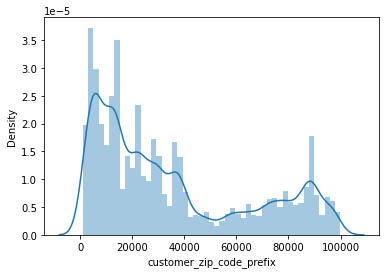

In [14]:
sns.distplot(customer['customer_zip_code_prefix'])

In [23]:
city = customer['customer_city'].value_counts()
city_percent = (city/len(customer) * 100).sort_values(ascending = False)
customer_city = pd.concat([city,city_percent],axis = 1, keys = ['city','city_percent'])
customer_city

,city,city_percent
sao paulo,15540,15.627357
rio de janeiro,6882,6.920687
belo horizonte,2773,2.788588
brasilia,2131,2.142979
curitiba,1521,1.529550
...,...,...
bequimao,1,0.001006
andarai,1,0.001006
vargem grande,1,0.001006
curvelandia,1,0.001006


In [33]:
state = customer['customer_state'].value_counts()
state_percent = (state/len(customer) * 100).sort_values(ascending = False)
customer_state = pd.concat([state,state_percent],axis = 1, keys = ['state','state_percent'])
customer_state

,state,state_percent
SP,41746,41.980672
RJ,12852,12.924247
MG,11635,11.700405
RS,5466,5.496727
PR,5045,5.073360
SC,3637,3.657445
BA,3380,3.399000
DF,2140,2.152030
ES,2033,2.044428
GO,2020,2.031355


## 2. Orders

In [34]:
#orders
print("Number of columns: {0} and rows: {1}".format(len(orders.columns),len(orders.index)))
orders.info()

Number of columns: 8 and rows: 99441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
#transform datetime types
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [56]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [58]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [69]:
order_status = orders['order_status'].value_counts()
status_percent = (order_status/len(customer) * 100).sort_values(ascending = False)
order_status_percent = pd.concat([order_status,status_percent],axis = 1, keys = ['order_status','status_percent'])
order_status_percent

,order_status,status_percent
delivered,96478,97.020344
shipped,1107,1.113223
canceled,625,0.628513
unavailable,609,0.612423
invoiced,314,0.315765
processing,301,0.302692
created,5,0.005028
approved,2,0.002011


In [45]:
missing = orders.isnull().sum()
misssing = missing[missing > 0]
missing

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [50]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73646,525dc92e46b18d912eb8462c043bff60,efca6623ba3c1feda8e61a3741188b4c,delivered,2017-06-07 18:05:35,2017-06-07 18:15:18,2017-06-08 16:57:30,2017-06-19 14:32:13,2017-07-04
46028,d3c45d7784ed004c4ed67e4dd0f1cf38,3d70e248069f8145ca013f3dc8a948a3,delivered,2018-03-28 06:03:07,2018-03-28 06:15:10,2018-03-29 23:41:04,2018-04-10 00:20:55,2018-04-16
96623,e5d3a9fd67a092461d0a4e3feb145fb5,dcca41a026a2c9326ed70adf39220274,processing,2017-12-24 13:33:13,2017-12-27 04:07:00,NaT,NaT,2018-01-19
59421,c830cc216aadfbfc979193cf372cae2d,9bbbd8b1e256e236f1d77b4fc5f4a17d,delivered,2017-08-09 15:02:38,2017-08-09 15:15:09,2017-08-14 15:47:49,2017-08-18 19:23:03,2017-08-29
15180,1bacdc28aad23d1396a3fd39fdaa6c4f,967afc6202a8b72db982bbd579fda7a7,delivered,2017-02-03 17:20:12,2017-02-03 17:30:16,2017-02-06 11:51:55,2017-02-09 09:51:35,2017-03-15


## 3.Order Items

In [71]:
#order_items
print("Number of columns: {0} and rows: {1}".format(len(order_items.columns),len(order_items.index)))
order_items.info()

Number of columns: 7 and rows: 112650
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [68]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

In [59]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [67]:
order_items.describe(include=['object'])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


<AxesSubplot:xlabel='order_item_id', ylabel='Count'>

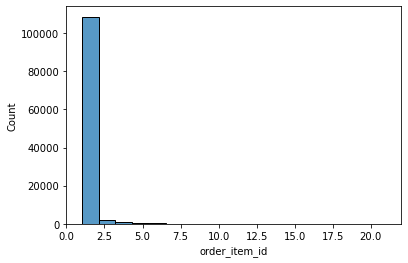

In [63]:
sns.histplot(order_items['order_item_id'])

<AxesSubplot:xlabel='price', ylabel='Density'>

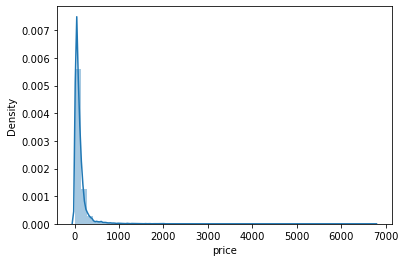

In [66]:
sns.distplot(order_items['price'])

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

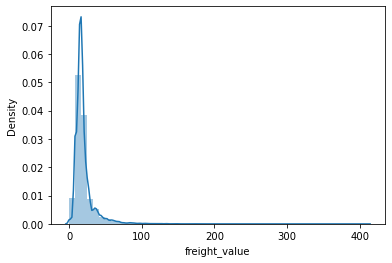

In [65]:
sns.distplot(order_items['freight_value'])

## 4. Products

In [72]:
#products
print("Number of columns: {0} and rows: {1}".format(len(products.columns),len(products.index)))
products.info()

Number of columns: 9 and rows: 32951
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [73]:
product_missing = products.isnull().sum()
product_missing = product_missing[product_missing > 0]
product_missing

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [74]:
product_missing_percent = (product_missing/len(products) * 100).sort_values(ascending = False)
product_missing_values = pd.concat([product_missing,product_missing_percent],axis = 1, keys = ['missing_values','missing_percent'])
product_missing_values

,missing_values,missing_percent
product_category_name,610,1.851234
product_name_lenght,610,1.851234
product_description_lenght,610,1.851234
product_photos_qty,610,1.851234
product_weight_g,2,0.006070
product_length_cm,2,0.006070
product_height_cm,2,0.006070
product_width_cm,2,0.006070


In [75]:
products.describe(include=['object'])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [76]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<AxesSubplot:xlabel='product_photos_qty', ylabel='Count'>

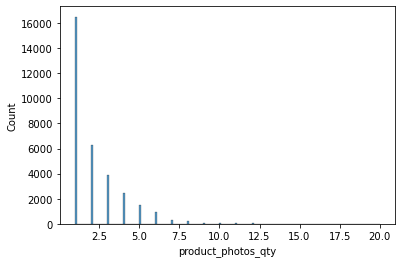

In [77]:
sns.histplot(products['product_photos_qty'])